# PREDICT THE TERRORISTS

In [1]:
import requests
from mpl_toolkits.basemap import Basemap
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [4]:
T1= pd.read_excel('gtd.xlsx', 'Sheet1', index_col=None, na_values=['NA'])
T1.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,4.237300e+04,42373.000000,42373.000000,42373.000000,42373.000000,42373.000000,42373.000000,41436.000000,41435.000000,41505.000000,...,1.870000e+02,1.780000e+02,1.840000e+02,177.000000,2919.000000,2913.000000,42373.000000,42373.000000,42373.000000,42373.000000
mean,2.013025e+11,2012.957449,6.570859,15.670333,0.053265,123.115970,8.050811,26.838381,52.778540,1.459029,...,5.223737e+06,7.960635e+05,9.503207e+04,-3.355932,4.784515,-35.732235,-6.326411,-6.281052,0.068534,-5.878531
std,1.035688e+08,1.036166,3.389670,8.808701,0.224564,84.381499,2.294060,12.637930,31.980547,0.916715,...,2.561158e+07,9.904564e+06,6.517286e+05,17.966600,2.015657,53.169408,4.133232,4.207237,0.302409,4.406935
min,2.011010e+11,2011.000000,1.000000,0.000000,0.000000,4.000000,1.000000,-41.133472,-124.224996,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,2.012082e+11,2012.000000,4.000000,8.000000,0.000000,94.000000,6.000000,17.088096,42.778059,1.000000,...,-9.900000e+01,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.013091e+11,2013.000000,7.000000,16.000000,0.000000,110.000000,9.000000,32.660833,45.122760,1.000000,...,3.338900e+04,0.000000e+00,-9.900000e+01,0.000000,5.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
75%,2.014051e+11,2014.000000,10.000000,23.000000,0.000000,153.000000,10.000000,34.179100,70.086372,1.000000,...,3.625750e+05,0.000000e+00,0.000000e+00,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.015022e+11,2014.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,65.683368,175.070783,5.000000,...,2.000000e+08,1.320000e+08,8.117150e+06,0.000000,7.000000,837.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
T2=T1[["eventid", "latitude","longitude","weaptype1","nkill"]].set_index(["eventid"])

In [8]:
T2=T2.dropna()

In [9]:
# lower left
llcrnrlon, llcrnrlat = T2['longitude'].min(), T2['latitude'].min()
# upper right
urcrnrlon, urcrnrlat = T2['longitude'].max(), T2['latitude'].max()

In [10]:
T2['nkill'].max()

1500.0

In [11]:
lons, lats,kills = list(T2['longitude']), list(T2['latitude']), list(T2['nkill'])

In [12]:
# 按等级配色
def get_marker_color(kills):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if kills == 0:
        return ('bo')
    if kills < 5.0:
        return ('go')
    elif kills < 50.0:
        return ('yo')
    else:
        return ('ro')

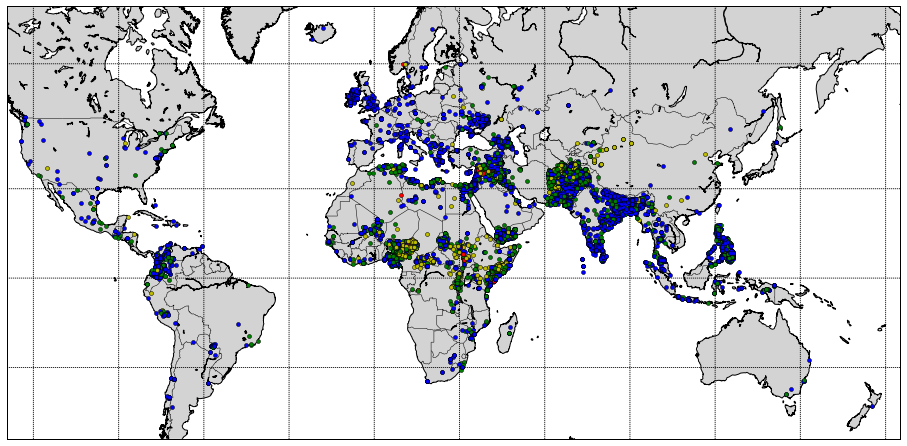

In [15]:
fig = plt.figure(figsize=(16,12))
ax = plt.subplot(1,1,1)
eq_map = Basemap(projection='merc', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=120,
              llcrnrlon=llcrnrlon-5, llcrnrlat=llcrnrlat-8,
              urcrnrlon=urcrnrlon+10, urcrnrlat=urcrnrlat+3)

eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'lightgray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))

min_marker_size = 4
for lon, lat, mag in zip(lons,lats,kills):
    x,y = eq_map(lon, lat)
    msize =min_marker_size
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)

plt.show()

### 蓝色是袭击未遂（造成零人死亡）的案例，基本在各大洲都有分布；绿色死亡五人以下；黄色五到50人；红色50人以上  
教程[在此](http://introtopython.org/visualization_earthquakes.html)

中东区域太小了，来来来我们仔细看看

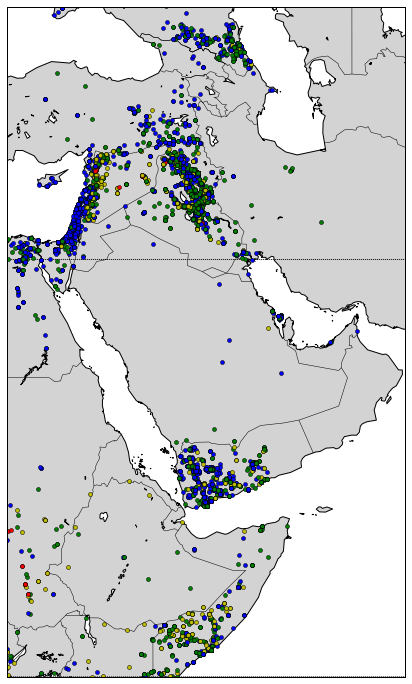

In [16]:
fig = plt.figure(figsize=(16,12))
ax = plt.subplot(1,1,1)
eq_map = Basemap(projection='merc', resolution = 'l', area_thresh = 1,
              lat_0=22.5, lon_0=45,
              llcrnrlon=30, llcrnrlat=0,
              urcrnrlon=60, urcrnrlat=45)

eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'lightgray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))

min_marker_size = 4
for lon, lat, mag in zip(lons,lats,kills):
    x,y = eq_map(lon, lat)
    msize =min_marker_size
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)

plt.show()

看了这么多，不得不说全球恐怖主义已经成为一个风潮。更重要的是，在kaggle上看到这样的袭击背后有强大的社交网络作为支撑。[详情在此](https://medium.com/fifth-tribe-stories/isis-has-a-twitter-strategy-and-it-is-terrifying-7cc059ccf51b#.j0hhs4dkg)  
Twitter is the cornerstone of the group’s digital strategy. 80% to 90% of its social media comes from twitter with a projected 46,000 to 70,000 accounts all over the world that are linked to promoting messages of hate (NYT). There are an estimated 21,000 English-language followers alone. (CNN) Most content comes from 2,000 over-performers that tweet in bursts of 50 or more tweets per day with each of these over-performers having an average of 1,004 followers. The result is an astonishing estimated 200,000 tweets per day. (The Brookings Institute)

### kagge提到的分析方法  
Based on this data, here are some useful ways of deriving insights and analysis:

- **Social Network Cluster Analysis**: Who are the major players in the pro-ISIS twitter network? Ideally, we would like this visualized via a cluster network with the biggest influencers scaled larger than smaller influencers.
- **Keyword Analysis**: Which keywords derived from the name, username, description, location, and tweets were the most commonly used by ISIS fanboys? Examples include: "baqiyah", "dabiq", "wilayat", "amaq"
- **Data Categorization of Links**: Which websites are pro-ISIS fanboys linking to? Categories include: Mainstream Media, Altermedia, Jihadist Websites, Image Upload, Video Upload,
- **Sentiment Analysis**: Which clergy do pro-ISIS fanboys quote the most and which ones do they hate the most? Search the tweets for names of prominent clergy and classify the tweet as positive, negative, or neutral and if negative, include the reasons why. Examples of clergy they like the most: "Anwar Awlaki", "Ahmad Jibril", "Ibn Taymiyyah", "Abdul Wahhab". Examples of clergy that they hate the most: "Hamza Yusuf", "Suhaib Webb", "Yaser Qadhi", "Nouman Ali Khan", "Yaqoubi".
- **Timeline View**: Visualize all the tweets over a timeline and identify peak moments

马里兰大学开发算法来预测恐怖组织虔诚军的攻击

在印度和巴基斯坦之间进行运作的恐怖组织虔诚军，制造了2008年孟买爆炸事件。马里兰大学推行类似于亚马逊预测客户行为的数据挖掘分析算法的解析技术，对恐怖组织虔诚军进行计算分析，从该恐怖组织20年的活动中挖掘出770个变量数据。

通过使用770个变量的月度数据，安全机构能够确定各种因素，比如，在各种地缘政治局势中有哪些不同类型的恐怖袭击，有哪些造成袭击事件频繁发生因素，恐怖组织如何选择他们的袭击位置，等等。这项由马里兰大学LCCD(计算文化动力学实验室)开发的专有项目，与另一个时态概率规则系统项目一起，从国防部那里获得了60万美元的资金支持。
[源链接](http://www.umiacs.umd.edu/research/LCCD/)

-**面部识别**
Gilboa说，Faception以80%的精度，评估面部的特定特征。“利用先进的机器学习技术，我们开发了一系列分类项，并正在不断进化。这些分类项代表了一种特定的性格角色，一种特殊的性格特征，是性格特征或者行为的一个集合体。我们的算法可以根据一个人在这些分类项中的匹配度进行打分。”
Gilboa在一个关于Faception的视频中说道：“我们的技术将其中的9人都标记为潜在恐怖分子，而我们并没有他们的任何档案。”
[链接](http://toutiao.com/i6291135639588962818/)

-**社交分析**
以色列是最早在反恐中使用大数据技术的国家之一，这得益于以军的8200部门。8200是以军最精英的电子情报机构，专门从事电子侦察活动，也是以色列大数据技术的领军者。他们搜集网络信息、监听电话以及截获政府、组织甚至个人的电子邮件，经大数据技术处理用于反恐。8200同时还成为以色列高科技的推手，大量8200退伍的技术人才成为高科技公司创始人，继续开发大数据的新技术和软件。
埃拉德·科策就是原8200的情报技术人员。他退伍后，利用在军队中掌握的大数据技术，帮助以色列一家公司开发了网络实时监控软件。这种软件可以利用数据地图和链接分析，实时监控“脸书”（Facebook）和推特（Twitter）等社交媒体动态，每分钟能看30万个帖子，谁发了帖、谁点了赞，找出最活跃的成员，追踪他们的地理位置，看他们去什么地方参与具体行动……不用黑客入侵，一切都是利用大数据在公开网络上获取和挖掘出的信息。
一个最近的例子是在去年夏天的加沙战争中，以色列军和辛贝特用大数据技术定位追踪哈马斯几名头领。以色列情报机构搜集到的海量杂乱无序看似无关的视频文件、图片、文字和讲话，通过大数据技术挖掘分析与比对，提炼成十分有用的行动性情报线索，提交给高级别的情报分析员做出判断，最终由以色列军方采用这些情报来追踪和击杀哈马斯领导人。以色列在加沙地带进行了一系列针对哈马斯军事组织高级领导人的“定点清除”，大都是依靠大数据技术。
[链接](http://m.blog.csdn.net/article/details?id=49873071)

In [ ]:
https://www.kaggle.com/ggospodinov/d/kzaman/how-isis-uses-twitter/tweet-analysis2/code

In [2]:
cd

C:\Users\Xueying


#### 1、导入、查看、清理数据

In [4]:
S1= pd.read_excel('tweets2.xlsx', 'Sheet1', index_col=None, na_values=['NA'])
S1.describe()

,followers,numberstatuses
count,17410.000000,17410.000000
mean,3975.076680,4760.787651
std,8674.378495,7015.967275
min,16.000000,1.000000
25%,266.000000,207.000000
50%,928.000000,908.000000
75%,1791.000000,6865.000000
max,34692.000000,33091.000000


In [5]:
S1.head(10)

,name,username,description,location,followers,numberstatuses,tweets,date,time
0,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,ENGLISH TRANSLATION: 'A MESSAGE TO THE TRUTHFU...,2015-01-06,21:07:00
1,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,ENGLISH TRANSLATION: SHEIKH FATIH AL JAWLANI '...,2015-01-06,21:27:00
2,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,ENGLISH TRANSLATION: FIRST AUDIO MEETING WITH ...,2015-01-06,21:29:00
3,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,ENGLISH TRANSLATION: SHEIKH NASIR AL WUHAYSHI ...,2015-01-06,21:37:00
4,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,ENGLISH TRANSLATION: AQAP: 'RESPONSE TO SHEIKH...,2015-01-06,21:45:00
5,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,THE SECOND CLIP IN A DA'WAH SERIES BY A SOLDIE...,2015-01-06,21:51:00
6,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,ENGLISH TRANSCRIPT : OH MURABIT! : http://t.co...,2015-01-06,22:04:00
7,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,ENGLISH TRANSLATION: 'A COLLECTION OF THE WORD...,2015-01-06,22:06:00
8,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,Aslm Please share our new account after the pr...,2015-01-06,22:17:00
9,GunsandCoffee,GunsandCoffee70,ENGLISH TRANSLATIONS: http://t.co/QLdJ0ftews,NaN,640,49,ENGLISH TRANSLATION: AQAP STATEMENT REGARDING ...,2015-01-10,00:05:00


In [6]:
S1['count'] = 1

In [7]:
S2=S1[["username", "location","followers","numberstatuses","date","time","tweets","count"]].set_index(["username"])

In [8]:
S2=S2.dropna()

#### 2、发推时间分析

In [10]:
S4=S2[["date","count"]].set_index(["date"])

In [11]:
S4= S4.sum(level="date").sort_values("count",ascending= False )

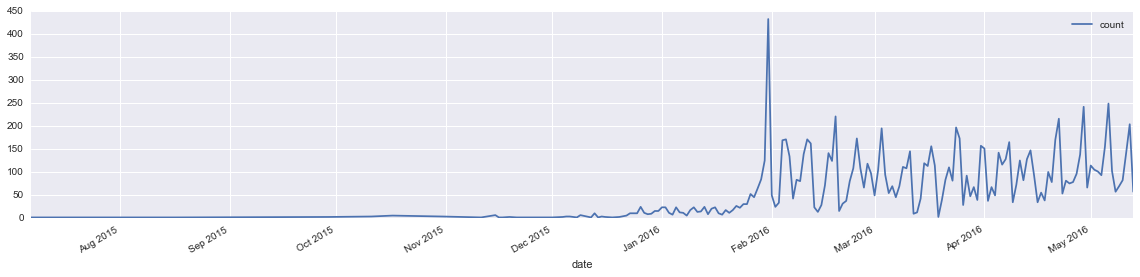

In [12]:
#初步画图得知，2015年发出的推特非常少，基本每天都是个位数，所以重点分析2016年。
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
S4.plot(ax=ax)
fig.tight_layout()


In [13]:
S5= S4["2016-1-1":"2016-5-13"]

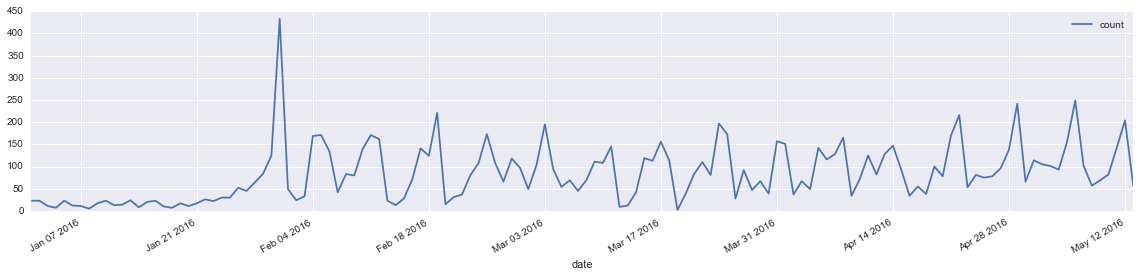

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
S5.plot(ax=ax)
fig.tight_layout()
#呈现周期性波动，那么更近的观察周期。

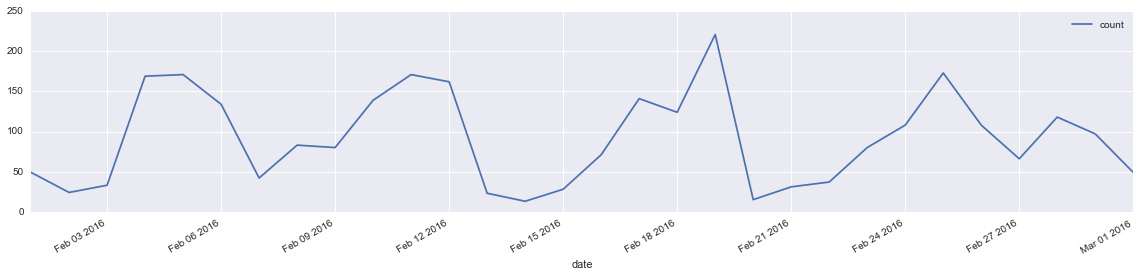

In [43]:
S6= S4["2016-2-1":"2016-3-1"]
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
S6.plot(ax=ax)
fig.tight_layout()


通过判读，每周四和周五推特用户最为活跃
一开始不懂为啥，后来看到了这个材料
-**穆斯林国家的“传统”周末**
起初，大量的穆斯林国家选择将周末定为周四周五。而时至今日，只有三个国家仍然遵照传统：索马里、阿富汗和也门。某些穆斯林国家选择妥协并宣告将周末由周四周五变为周五周六的原因。做出这个改变的有19个国家，其中包括阿尔及利亚（2009年）、埃及、卡塔尔、毛里塔尼亚、伊拉克、乍得、苏丹、叙利亚、约旦以及沙特阿拉伯。

#### 3、用户发推频次分析

In [67]:
S3=S1[["username", "count"]].set_index(["username"])

In [70]:
S3 = S3.sum(level="username").sort_values("count", ascending=False)

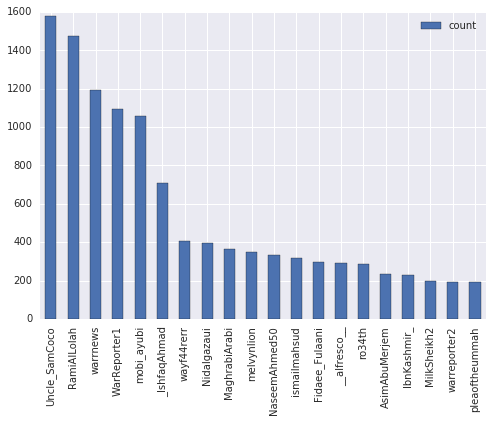

In [72]:
plt.figure(figsize=(12,4))
ax = S3[:20].plot.bar()
ax.set_xticklabels(S3.index,rotation='90')
ax.set_xlabel('');
fig.tight_layout()
#发帖最多的是一个叫山姆大叔可可的家伙，唉

#### 4、导入社交网络分析组件NetworkX 
分析各个用户之间的互动
NetworkX is a useful graph library which allows for the visualization of graphs
its draw functions are directly linked to matplotlib allowing for similar looking visualizations to be created.

In [73]:
import networkx as nx

In [74]:
import re#
from collections import Counter

#re:导入正则表达式：Regular Expression，在代码中常简写为regex、regexp或RE，计算机科学的一个概念。正则表达式使用单个字符串来描述、匹配一系列符合某个句法规则。在很多文本编辑器里，正则表达式通常被用来检索、替换那些符合某个模式的文本。
#counter:导入collection模块里的Counter类型。

Unique tweets: 17410
All tweets: 17410


[<matplotlib.text.Text at 0x1118e470>, <matplotlib.text.Text at 0x1119a9b0>]

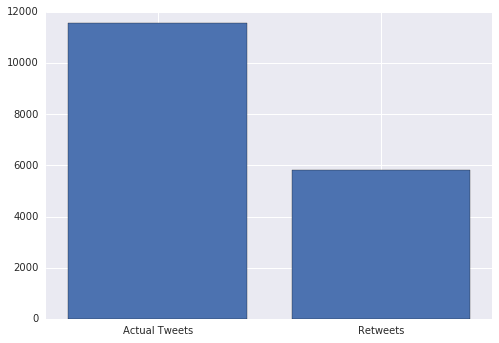

In [79]:
print("Unique tweets: {}".format(len(S1['tweets'].unique())))
print("All tweets: {}".format(len(S1['tweets'])))

retweets = []
actual_tweets = []
for user, tweet in zip(S1['username'], S1['tweets']):
#zip()是Python的一个内建函数，它接受一系列可迭代的对象作为参数，将对象中对应的元素打包成一个个tuple（元组），然后返回由这些tuples组成的list（列表）。
    match = re.search(r'^\bRT\b', tweet)
    if match == None:
        actual_tweets.append([user,tweet])
    else:
        retweets.append([user,tweet])   

actual_tweets = np.array(actual_tweets)
retweets = np.array(retweets)

plt.bar([1,2], [len(actual_tweets[:,1]), len(retweets[:,1])], align='center')
ax = plt.gca()
ax.set_xticks([1,2])
ax.set_xticklabels(['Actual Tweets', 'Retweets'])

看看这个数据的内部结构，从推特@的记录来看各个帐号之间的关系

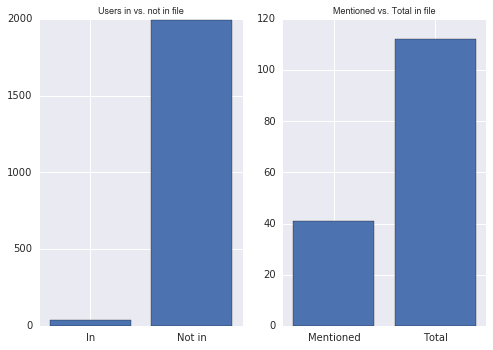

In [81]:
in_set = []
not_in_set = []
for record in actual_tweets:
    match = re.findall(r'@\w*', record[1])
    if match != []:
        for name in match:
            if (name[1:] in S1['username'].unique()) and (record[0] != name[1:]):
                in_set.append([record[0], name[1:]])
            elif record[0] != name[1:]:
                not_in_set.append([record[0], name[1:]])

in_set = np.array(in_set)
not_in_set = np.array(not_in_set)

fig, ax = plt.subplots(1,2)

ax[0].bar([1,2], [len(np.unique(in_set[:,1])), len(np.unique(not_in_set[:,1]))], align='center')
ax[0].set_xticks([1,2])
ax[0].set_xticklabels(['In', 'Not in'])
ax[0].set_title('Users in vs. not in file', fontsize=9)

ax[1].bar([1,2], [len(np.unique(in_set[:,1])), len(S1['username'].unique())], align='center')
ax[1].set_xticks([1,2])
ax[1].set_xticklabels(['Mentioned', 'Total'])
ax[1].set_title('Mentioned vs. Total in file', fontsize=9)

看看谁被@的最多

In [88]:
sender_count = Counter(in_set[:,0])
receiver_count = Counter(in_set[:,1])#被@的人
top_5_senders = sender_count.most_common(5)
top_5_receivers = receiver_count.most_common(5)

print(top_5_senders)
print(top_5_receivers)

[(u'MaghrabiArabi', 49), (u'WarReporter1', 30), (u'Uncle_SamCoco', 27), (u'AsimAbuMerjem', 27), (u'moustiklash', 20)]
[(u'RamiAlLolah', 53), (u'Nidalgazaui', 34), (u'MilkSheikh2', 26), (u'_IshfaqAhmad', 15), (u'WarReporter1', 15)]


In [94]:
for name, _ in top_5_receivers:
    print("Username: {} - {}\n".format(name,
            S1[S1['username'] == name]['description'].dropna().unique()[0]))

Username: RamiAlLolah - Real-Time News, Exclusives, Intelligence & Classified Information/Reports from the ME. Forecasted many Israeli strikes in Syria/Lebanon. Graphic content.

Username: Nidalgazaui - 17yr. old Freedom Activist
/Correspondence of NGNA /Terror Expert/Middle East Expert. Daily News about Syria/Iraq/Yemen/Russia/Middle East

Username: MilkSheikh2 - Muslim, Iraqi, Banu Zubid, Qahtani, Chef, Engineer, Remaining until the best of them, fights al-Dajjal, Translate Old stuff mostly



UnicodeEncodeError: 'ascii' codec can't encode character u'\u2022' in position 23: ordinal not in range(128)

把节点分成三类画图
1 - 只发消息（红色）Only senders (Red)
2 - 只收消息（蓝色）Only receivers (Blue)
3 - 收发并举（绿色）Senders and Receivers (Green)

In [95]:
graph = nx.Graph()

all_users = list(set(in_set[:,0]) | set(in_set[:,1]))
graph.add_nodes_from(all_users, count=10)
node_colours = []

for node in graph.nodes():
    if node in (set(in_set[:,0]) & set(in_set[:,1])):
        node_colours.append('g')
    elif node in np.unique(in_set[:,0]):
        node_colours.append('r')
    elif node in np.unique(in_set[:,1]):
        node_colours.append('b')

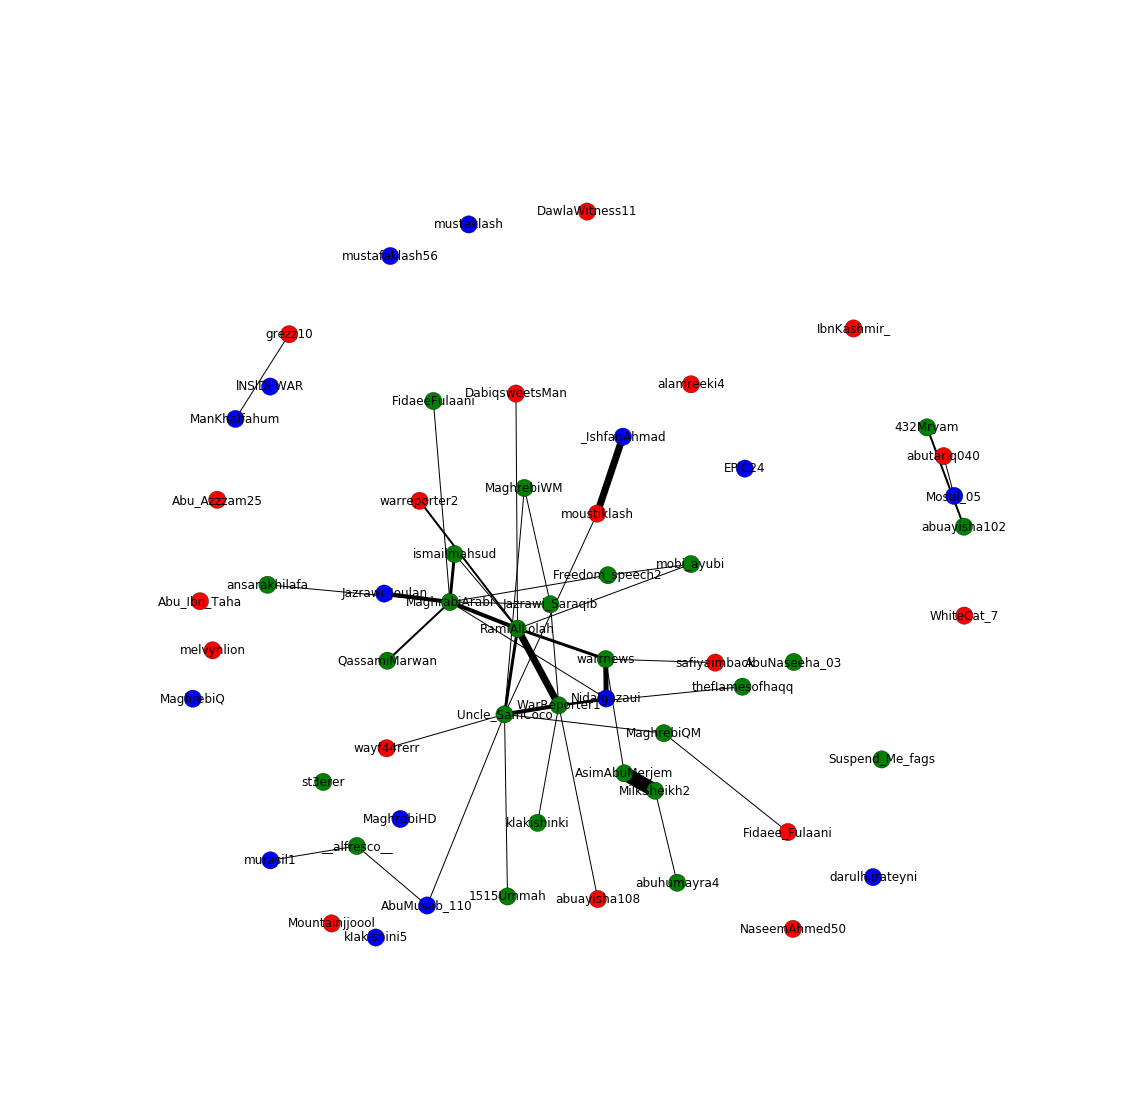

In [96]:
#weighted edges 权重图
edges = {}
occurrence_count = Counter(map(tuple, in_set))
for (sender, receiver), count in occurrence_count.items():
    if (receiver, sender) in edges.keys():#edges的关键属性
        edges[(receiver, sender)] = edges[(receiver, sender)] + count
    else:
        edges[(sender, receiver)] = count
        
for (sender, receiver), count in edges.items():
    graph.add_edge(sender, receiver, weight=count)
    
followers = {}
tweet_num = {}
for username in all_users:
    followers[username] = S1[S1['username'] == username]['followers'].unique()[-1]
    tweet_num[username] = S1[S1['username'] == username]['tweets'].count()

sizes = [(followers[n] / tweet_num[n]) * 50 for n in graph.nodes()] 
weights = [graph.edge[u][v]['weight']/2 for u, v in graph.edges()]

plt.figure(figsize=(15,15))
nx.draw(graph, pos=nx.spring_layout(graph),
        node_color=node_colours, with_labels=True, width=weights)
plt.show()

#### 6、词频分析

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [16]:
X_all = S1.tweets
Y_all = S1.followers

In [17]:
from sklearn import cross_validation
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X_all, Y_all, train_size=0.8)

In [52]:
count_vec = CountVectorizer()
X_train_counts = count_vec.fit_transform(X_train)
X_train_counts.shape
#13928行，30910列，一般推特比较长嘛

(13928, 30910)

In [58]:
count_vec.vocabulary_.get(u'kill')

13846

In [59]:
count_vec.vocabulary_.get(u'love')

14747

In [60]:
count_vec.vocabulary_.get(u'hate')

11030

In [61]:
#转化词频数为 TF-IDF matrix
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(13928, 30910)

In [62]:
# 使用 multinomial variant in naive bayes 进行分类
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, Y_train)

In [63]:
# 对 test data 处理为 tfidf, 进行 predict
X_test_counts = count_vec.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
X_test_tfidf.shape

(3482, 30910)

In [64]:
Y_predicted = clf.predict(X_test_tfidf)

In [65]:
np.mean(Y_predicted == Y_test)

0.12291786329695577

In [19]:
tweets_all=S1[["username", "tweets"]].set_index(["username"])

In [117]:
count_vector = CountVectorizer(min_df = 0.02,max_df = 0.6)
term_count = count_vector.fit_transform(tweets_all.tweets)
term_count.shape

(17410, 80)

In [118]:
count_vector.get_feature_names()

[u'about',
 u'abu',
 u'after',
 u'against',
 u'al',
 u'aleppo',
 u'all',
 u'allah',
 u'amp',
 u'an',
 u'and',
 u'are',
 u'army',
 u'as',
 u'assad',
 u'at',
 u'attack',
 u'be',
 u'breaking',
 u'but',
 u'by',
 u'city',
 u'co',
 u'fighters',
 u'for',
 u'forces',
 u'from',
 u'has',
 u'have',
 u'he',
 u'his',
 u'https',
 u'if',
 u'in',
 u'iraq',
 u'iraqi',
 u'is',
 u'isis',
 u'islamic',
 u'islamicstate',
 u'it',
 u'killed',
 u'near',
 u'no',
 u'not',
 u'now',
 u'of',
 u'on',
 u'one',
 u'people',
 u'ramiallolah',
 u'regime',
 u'rt',
 u'russia',
 u'so',
 u'soldiers',
 u'state',
 u'syria',
 u'syrian',
 u'that',
 u'the',
 u'their',
 u'them',
 u'they',
 u'this',
 u'to',
 u'today',
 u'turkey',
 u'us',
 u'usa',
 u'was',
 u'we',
 u'were',
 u'what',
 u'when',
 u'who',
 u'will',
 u'with',
 u'you',
 u'ypg']

In [119]:
term_count.toarray().T

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

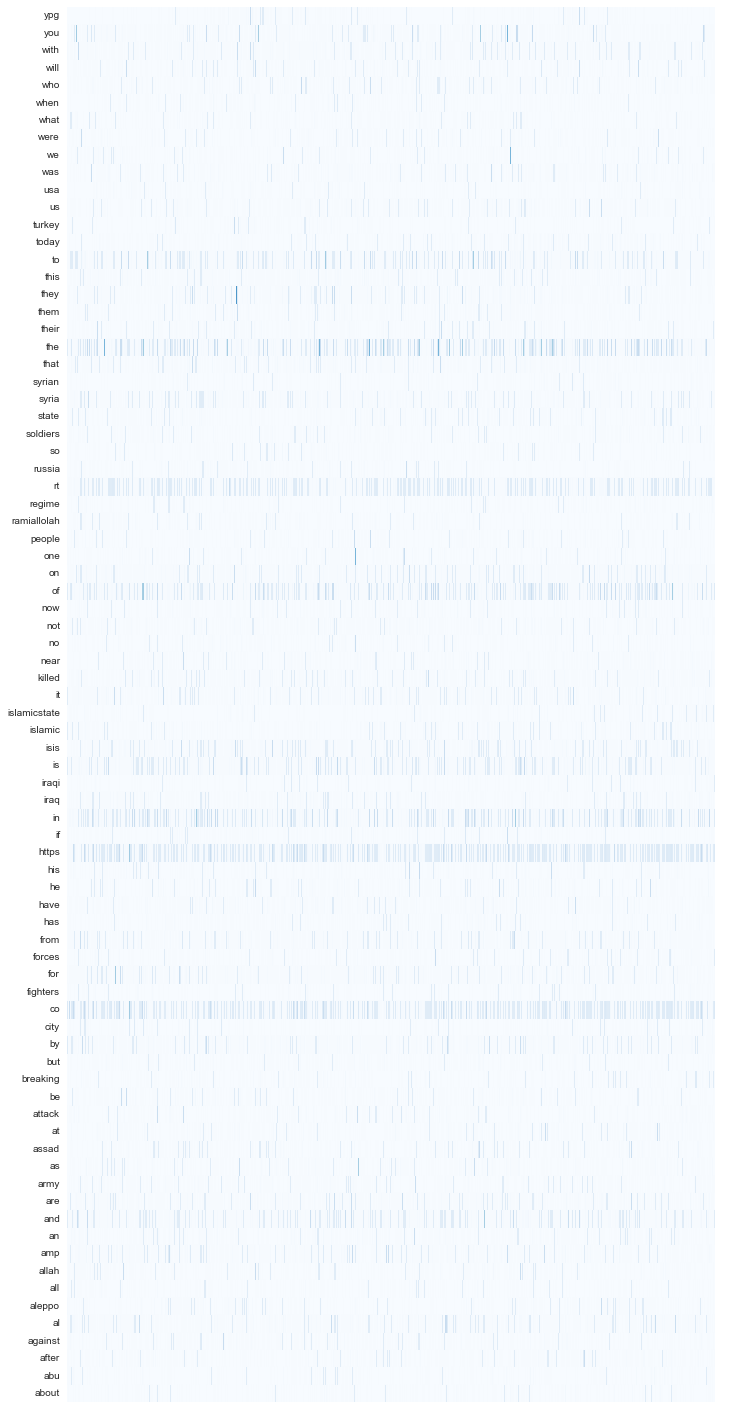

In [120]:
# 参考 http://nbviewer.jupyter.org/gist/joelotz/5427209
fig, ax = plt.subplots(figsize=(12,25))
heatmap = ax.pcolor(term_count.toarray().T, cmap=plt.cm.Blues, alpha=0.9)

ax.set_frame_on(False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

# put the major ticks at the middle of each cell
ax.set_yticks(np.arange(term_count.toarray().T.shape[0]) + 0.5, minor=False)
ax.set_xticks(np.arange(term_count.toarray().T.shape[1]) + 0.5, minor=False)

# add label
xlabel = username[:20] #list of title
ylabel = count_vector.get_feature_names()
ax.set_xticklabels(xlabel, minor=False)
ax.set_yticklabels(ylabel, minor=False)

# rotate the x label
plt.xticks(rotation=90)

ax.grid(False)

# Turn off all the ticks
ax = plt.gca()

for t in ax.xaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False
for t in ax.yaxis.get_major_ticks():
    t.tick1On = False
    t.tick2On = False

In [18]:
from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt

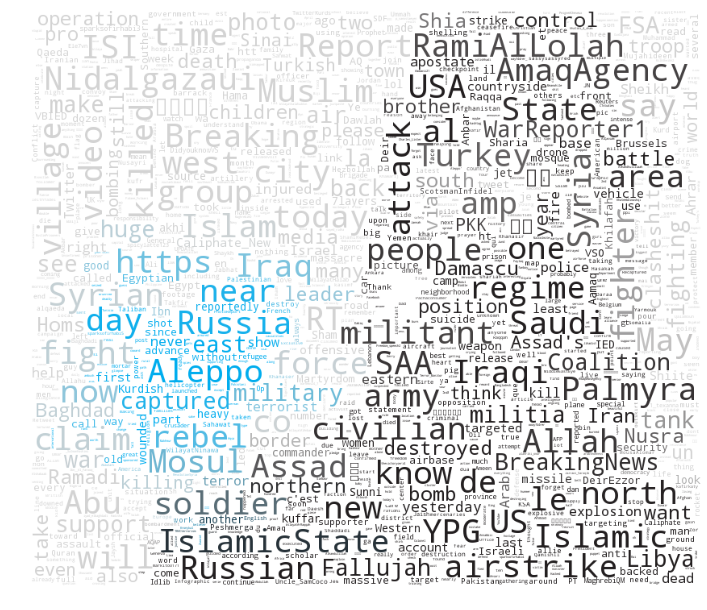

In [22]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
full_text = ' '.join(tweets_all.tweets)
# read the mask / color image
# taken from http://lukaskaraba.deviantart.com/art/Shakespeare-minimalist-poster-2-462903294
isis_coloring = imread("twitter.jpg")

wc = WordCloud(background_color="white", max_words=3000, mask=isis_coloring,
               stopwords=STOPWORDS.add("said"),
               max_font_size=40, random_state=100)
# generate word cloud
wc.generate(full_text)

image_colors = ImageColorGenerator(isis_coloring)

plt.figure(figsize = (12,20))
plt.imshow(wc.recolor(color_func=image_colors),aspect='equal')
plt.axis("off")

plt.show()
fig.savefig("terrorist.jpg")

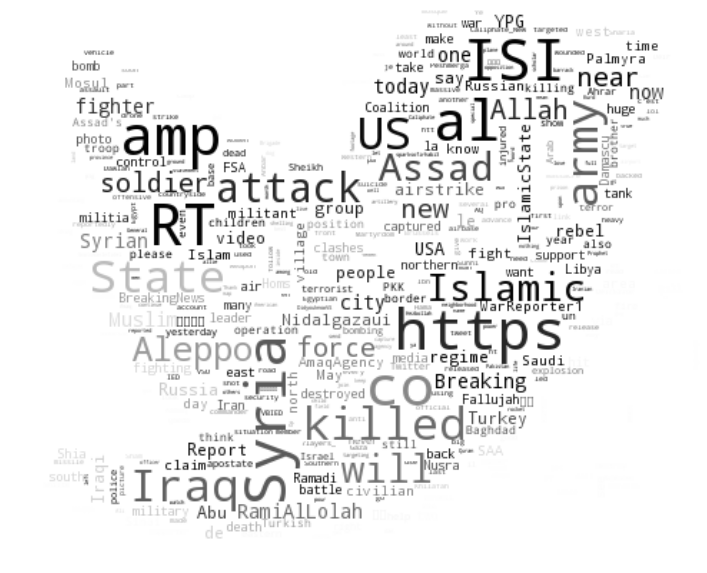

In [26]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
full_text = ' '.join(tweets_all.tweets)
isis_coloring = imread("twitter1.jpg")

wc = WordCloud(background_color="white", max_words=3000, mask=isis_coloring,
               stopwords=STOPWORDS.add("said"),
               max_font_size=40, random_state=100)
# generate word cloud
wc.generate(full_text)

image_colors = ImageColorGenerator(isis_coloring)

plt.figure(figsize = (12,20))
plt.imshow(wc.recolor(color_func=image_colors),aspect='equal')
plt.axis("off")

plt.show()